In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = np.array([750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200])
y = y = np.array([150, 155, 160, 165, 170, 175, 180, 185, 190, 195])
# X is the sizes of house in sq ft
# y is the prices in $1000

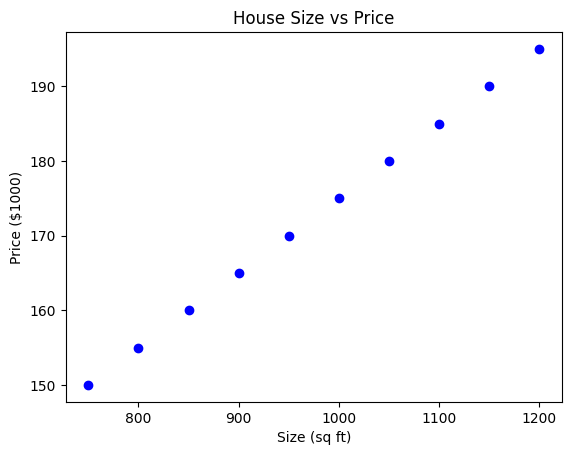

In [3]:
# plotting the data:
plt.scatter(X,y,color = 'blue', label = "Data Points")
# this is the original lines of the given datapoints
plt.title("House Size vs Price")
plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($1000)")
plt.show()

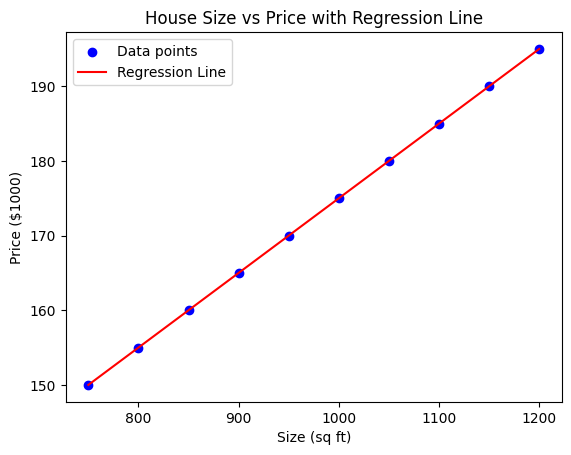

In [4]:
#  now plotting the fitting line:
mean_X = np.mean(X)
mean_y = np.mean(y)

numerator = np.sum((X - mean_X)*(y - mean_y))
denominator = np.sum((X - mean_X)**2)
# beta_1 as slope
beta_1 = numerator / denominator
# beta_0 as intercept
beta_0 = mean_y - (beta_1 * mean_X)

# Now, let's plot the regression line
regression_Line = beta_1 * X + beta_0

# plotting:
plt.scatter(X, y, color="blue", label="Data points")
# this was the original lines of the given datapoints
# now the regression line:
plt.plot(X, regression_Line, color = "Red" , label="Regression Line")
plt.title("House Size vs Price with Regression Line")
plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($1000)")
plt.legend()
plt.show()

## Now making predictions with this ML Model

In [5]:
house_size = 1300
predicted_price = beta_1 * house_size + beta_0
print(f"Predicted price for a 1300 sq ft house: ${predicted_price * 1000}")

Predicted price for a 1300 sq ft house: $205000.0


In [6]:
#  now we are gonna perform mse and r**2:
y_pred = predicted_price
# Calculate MSE:
mse = np.mean((y - y_pred)**2)
print(f"Mean Squared Error (MSE): {mse}")
#  we can for R squared technique:
r_num = np.sum((y - y_pred)**2)
r_deno = np.sum((y - mean_y)**2)
r_sqr = 1 - (r_num/r_deno)
print(f"R squared : {r_sqr}")

Mean Squared Error (MSE): 1262.5
R squared : -5.121212121212121


##### negative R Squared value defines that the model is performing poorly

###### The negative R squared and high MSE could be due to the limited and perfectly linear nature of the dataset. Real-world data tends to be more complex and may require more data points or more sophisticated models (like polynomial regression, regularization, etc.) for better predictions.

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression


In [15]:
# Features: [House size, Number of bedrooms]
X = np.array([
    [750, 2],
    [800, 3],
    [850, 2],
    [900, 3],
    [950, 3],
    [1000, 4],
    [1050, 3],
    [1100, 4],
    [1150, 4],
    [1200, 5]
])

# Target (Price in $1000)
y = np.array([150, 155, 160, 165, 170, 175, 180, 185, 190, 195])

ml_Model = LinearRegression()
ml_Model.fit(X,y)

# Print intercept and Slope:
print(f"Intercept : {ml_Model.intercept_}")
print(f"Slope : {ml_Model.coef_}")



Intercept : 74.99999999999999
Slope : [ 1.00000000e-01 -9.40812067e-16]


##### The intercept is approximately 75. This means that, according to the model, the base price of a house (when both house size and number of bedrooms are zero) is around $75,000. In practical terms, the intercept often serves as a starting value for the predictions.

##### The coefficient for house size is
1.00000000
𝑒
−
01
1.00000000e−01 (or 0.1), meaning that for every additional square foot of house size, the house price increases by $100.

The coefficient for number of bedrooms is
−
9.40812067
𝑒
−
16
−9.40812067e−16, which is essentially 0. This indicates that the number of bedrooms is having almost no effect on the house price in this particular dataset.

The nearly zero coefficient for bedrooms suggests that in this simple dataset, house size alone is a good predictor of the price, while the number of bedrooms doesn't significantly influence the price.

In [18]:
# Making predictions for new data:
new_data = np.array([[1500,6]])
predicted_price = ml_Model.predict(new_data)
predicted_price

array([225.])

### Let’s now evaluate how well the model fits the data using Mean Squared Error (MSE) and R-squared (
𝑅
2
R
2
 ).

In [19]:
from sklearn.metrics import mean_squared_error , r2_score

In [20]:
# Predicting prices for the training data
y_pred = ml_Model.predict(X)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-squared (R^2)
r2 = r2_score(y, y_pred)
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 0.0
R-squared (R^2): 1.0
